In [2]:
import pandas as pd

import numpy as np
import gc
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [20]:
sb_ratio = [0.001 , 0.00215443, 0.00464159,0.01, 0.02154435, 0.04641589, 0.1 , 0.21544347  ,0.46415888,1.0]
x_axis = []
for i in sb_ratio:
    if(i == 1.0):
        signal = 50000
        bg = 50000
    else:
        signal = (np.round(i * 100000))
        bg = (np.round((1 - i) * 100000))
    x_axis.append(signal/bg)


In [21]:
x_axis

[0.001001001001001001,
 0.0021546324597885454,
 0.004661629963028452,
 0.010101010101010102,
 0.02201418555689553,
 0.04867971224228696,
 0.1111111111111111,
 0.27459977567043947,
 0.8662287249925351,
 1.0]

In [22]:
for i in sb_ratio:
    if(i == 1.0):
        signal = 50000
        bg = 50000
    else:
        signal = (np.round(i * 100000))
        bg = (np.round((1 - i) * 100000))
    print(signal)
    print(bg)
    print(signal/bg)
    print(signal + bg)
    print('____')
    

100.0
99900.0
0.001001001001001001
100000.0
____
215.0
99785.0
0.0021546324597885454
100000.0
____
464.0
99536.0
0.004661629963028452
100000.0
____
1000.0
99000.0
0.010101010101010102
100000.0
____
2154.0
97846.0
0.02201418555689553
100000.0
____
4642.0
95358.0
0.04867971224228696
100000.0
____
10000.0
90000.0
0.1111111111111111
100000.0
____
21544.0
78456.0
0.27459977567043947
100000.0
____
46416.0
53584.0
0.8662287249925351
100000.0
____
50000
50000
1.0
100000
____


In [49]:
tpr_1 = []
tpr_4 = []
fpr_1 = []
fpr_4 = []
auc_1 = []
auc_4=[]
for j in range(50):
    tpr1 = np.load('./Results/Classifier/optimal/tpr/tpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
    tpr4 = np.load('./Results/Classifier/optimal2/tpr/tpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
    fpr1 = np.load('./Results/Classifier/optimal/fpr/fpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
    fpr4 = np.load('./Results/Classifier/optimal2/fpr/fpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
    auc1 = np.load('./Results/Classifier/optimal/auc/auc_list'+str(j)+'_.npy', allow_pickle=True)[0]
    auc4 = np.load('./Results/Classifier/optimal2/auc/auc_list'+str(j)+'_.npy', allow_pickle=True)[0]

    tpr_1.append(tpr1)
    tpr_4.append(tpr4)
    fpr_1.append(fpr1)
    fpr_4.append(fpr4)
    auc_1.append(auc1)
    auc_4.append(auc4)
    #print(len(tpr_1[0]))


In [54]:
j = 1
tpr1 = np.load('./Results/Classifier/optimal/tpr/tpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
tpr4 = np.load('./Results/Classifier/optimal2/tpr/tpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
fpr1 = np.load('./Results/Classifier/optimal/fpr/fpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
fpr4 = np.load('./Results/Classifier/optimal2/fpr/fpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
auc1 = np.load('./Results/Classifier/optimal/auc/auc_list'+str(j)+'_.npy', allow_pickle=True)[0]
auc4 = np.load('./Results/Classifier/optimal2/auc/auc_list'+str(j)+'_.npy', allow_pickle=True)[0]

Text(0.5, 1.0, 'ROC')

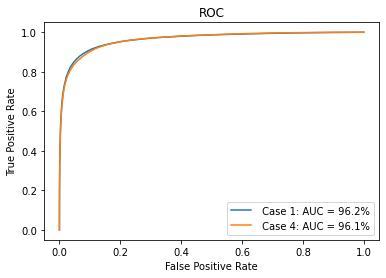

In [59]:

plt.plot(fpr1,tpr1,label=' Case 1: AUC = %.1f%%'%(mean_auc1*100.))
plt.plot(fpr4,tpr4,label=' Case 4: AUC = %.1f%%'%(mean_auc4*100.))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [ ]:

plt.plot(x_axis,auc_meanc2,label="Pythia")
plt.plot(x_axis,auc_meanc3,label="GAN")
plt.fill_between(x_axis, np.asarray(auc_meanc2) - np.asarray(auc_stdc2), np.asarray(auc_meanc2)+np.asarray(auc_stdc2),alpha = 0.5) 
plt.fill_between(x_axis, np.asarray(auc_meanc3) - np.asarray(auc_stdc3), np.asarray(auc_meanc3)+np.asarray(auc_stdc3),alpha = 0.5) 
plt.xscale('log')
plt.legend()
plt.xlabel("s/b")
plt.ylabel('auc')

In [30]:
auc_meanc3 = []
auc_stdc3 = []
auc_meanc2 = []
auc_stdc2 = []
for i in range(len(sb_ratio)):
    auc_avgc3 = []
    auc_avgc2 = []

    for j in range(50):
        acc3 = np.load('./Results/Classifier/backup/generated/auc/'+str(sb_ratio[i])+'/auc_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        acc2 = np.load('./Results/Classifier/sbvsb/auc/'+str(sb_ratio[i])+'/auc_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #acc3_2 = np.load('./Results/Classifier/generated2/auc/'+str(sb_ratio[i])+'/auc_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #acc2_2 = np.load('./Results/Classifier/sbvsb2/auc/'+str(sb_ratio[i])+'/auc_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        auc_avgc3.append(acc3)
        auc_avgc2.append(acc2)
        #auc_avgc3.append(acc3_2)
        #auc_avgc2.append(acc2_2)
    #print(len(auc_avgc3))
    auc_meanc3.append(np.mean(auc_avgc3,axis=0))
    auc_stdc3.append(np.std(auc_avgc3,axis=0))
    auc_meanc2.append(np.mean(auc_avgc2,axis=0))
    auc_stdc2.append(np.std(auc_avgc2,axis=0))


In [31]:
print(auc_meanc3)
print(auc_meanc2)

[0.6071646968394472, 0.5935121319750264, 0.6647072291851196, 0.6000899135763293, 0.7050761603102813, 0.7807288889099631, 0.8092184833289263, 0.8964679597534077, 0.9401575720722715, 0.9425881168097391]
[0.48920041189958685, 0.5138263759531181, 0.503360107030426, 0.5126883676398476, 0.5097456951915164, 0.7025180721897147, 0.7858847487721247, 0.8963084239775291, 0.9495124205280786, 0.9540623450186662]


Text(0, 0.5, 'auc')

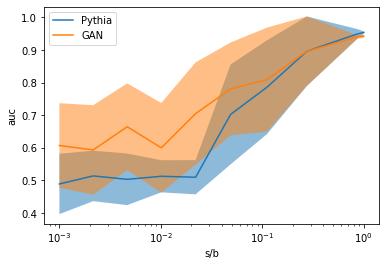

In [32]:

plt.plot(x_axis,auc_meanc2,label="Pythia")
plt.plot(x_axis,auc_meanc3,label="GAN")
plt.fill_between(x_axis, np.asarray(auc_meanc2) - np.asarray(auc_stdc2), np.asarray(auc_meanc2)+np.asarray(auc_stdc2),alpha = 0.5) 
plt.fill_between(x_axis, np.asarray(auc_meanc3) - np.asarray(auc_stdc3), np.asarray(auc_meanc3)+np.asarray(auc_stdc3),alpha = 0.5) 
plt.xscale('log')
plt.legend()
plt.xlabel("s/b")
plt.ylabel('auc')

In [12]:
maxtpr_list3 = []
maxtpr_sd3 = []
maxtpr_list2 = []
maxtpr_sd2 = []
for i in range(len(sb_ratio)):
    tpr_avg3 = []
    tpr_avg2 = []
    for j in range(5):

        tpr3 = np.load('./Results/Classifier/backup/generated/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr3 = np.load('./Results/Classifier/backup/generated/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #tpr3_2 = np.load('./Results/Classifier/generated2/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #fpr3_2 = np.load('./Results/Classifier/generated2/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]

        tpr2 = np.load('./Results/Classifier/sbvsb/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr2 = np.load('./Results/Classifier/sbvsb/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #tpr2_2 = np.load('./Results/Classifier/sbvsb2/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #fpr2_2 = np.load('./Results/Classifier/sbvsb2/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #if(len(tpr3)<50000 or len(fpr3)<50000):
           # continue

        tpr3 = tpr3[fpr3!=0]
        fpr3 = fpr3[fpr3!=0]
        #tpr3_2 = tpr3_2[fpr3_2!=0]
        #fpr3_2 = fpr3_2[fpr3_2!=0]
        #if(len(tpr2)<50000 or len(fpr2)<50000):
            #continue
        tpr2 = tpr2[fpr2!=0]
        fpr2 = fpr2[fpr2!=0]
        #tpr2_2 = tpr2_2[fpr2_2!=0]
        #fpr2_2 = fpr2_2[fpr2_2!=0]
        

        
        m3 = np.max(tpr3/np.sqrt(fpr3))
        m2 = np.max(tpr2/np.sqrt(fpr2))
        #print(m)

        
        
        tpr_avg3.append(m3)
        tpr_avg2.append(m2)
        
        #print(tpr_avg)
    #print('____')
    maxtpr_list3.append(np.mean(tpr_avg3,axis=0))
    maxtpr_sd3.append(np.std(tpr_avg3,axis=0))
    maxtpr_list2.append(np.mean(tpr_avg2,axis=0))
    maxtpr_sd2.append(np.std(tpr_avg2,axis=0))

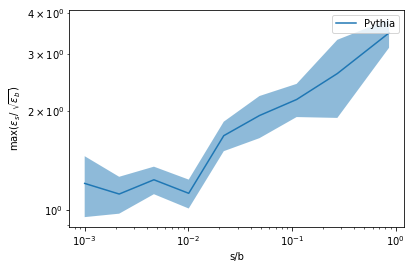

In [13]:

plt.plot(x_axis,maxtpr_list2,label = 'Pythia')
plt.plot(x_axis,maxtpr_list3,label = 'GAN')

plt.fill_between(x_axis, np.asarray(maxtpr_list2) - np.asarray(maxtpr_sd2), np.asarray(maxtpr_list2)+np.asarray(maxtpr_sd2),alpha = 0.5)
plt.fill_between(x_axis, np.asarray(maxtpr_list3) - np.asarray(maxtpr_sd3), np.asarray(maxtpr_list3)+np.asarray(maxtpr_sd3),alpha = 0.5)
plt.ylabel('max($\epsilon_s$/ $\sqrt{\epsilon_b}$)')
plt.xlabel('s/b')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [15]:
fpr50_mean3 = []
fpr50_sd3 = []
fpr50_mean2 = []
fpr50_sd2 = []
for i in range(len(sb_ratio)):
    fpr_avg3 = []
    fpr_avg2 = []

    #print('sb is ' + str(sb_ratio[i]))
    for j in range(50):
        tpr3 = np.load('./Results/Classifier/backup/generated/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr3 = np.load('./Results/Classifier/backup/generated/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #tpr3_2 = np.load('./Results/Classifier/generated2/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #fpr3_2 = np.load('./Results/Classifier/generated2/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        
        #tpr2 = np.load('./Results/Classifier/sbvsb/50iter/sbvsb/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #fpr2 = np.load('./Results/Classifier/sbvsb/50iter/sbvsb/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]

        tpr2 = np.load('./Results/Classifier/sbvsb/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr2 = np.load('./Results/Classifier/sbvsb/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]

        
        #fpr2_100 = np.append(fpr2,fpr2_2)
        #tpr2_100 = np.append(tpr2,tpr2_2)
        
        
        f3= fpr3[np.where(tpr3>0.5)[0][0]]
        t3 = tpr3[np.where(tpr3>0.5)[0][0]]
        
        f2= fpr2[np.where(tpr2>0.5)[0][0]]
        t2 = tpr2[np.where(tpr2>0.5)[0][0]]


        fpr_avg3.append(f3)
        
        fpr_avg2.append(f2)

    fpr50_mean3.append(np.mean(fpr_avg3,axis=0))
    fpr50_sd3.append(np.std(fpr_avg3,axis=0))
    fpr50_mean2.append(np.mean(fpr_avg2,axis=0))
    fpr50_sd2.append(np.std(fpr_avg2,axis=0))



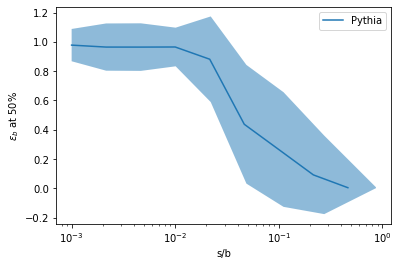

In [17]:
plt.plot(sb_ratio,fpr50_mean2,label = 'Pythia')
plt.plot(sb_ratio,fpr50_mean3,label = 'GAN')

plt.fill_between(x_axis, np.asarray(fpr50_mean2) - np.asarray(fpr50_sd2), np.asarray(fpr50_mean2)+np.asarray(fpr50_sd2),alpha = 0.5) 
plt.fill_between(x_axis, np.asarray(fpr50_mean3) - np.asarray(fpr50_sd3), np.asarray(fpr50_mean3)+np.asarray(fpr50_sd3),alpha = 0.5)
plt.ylabel('$\epsilon_b$ at 50%')
plt.xlabel('s/b')
plt.xscale('log')
plt.legend()

In [18]:
tfpr50_mean3 = []
tfpr50_sd3 = []
tfpr50_mean2 = []
tfpr50_sd2 = []
for i in range(len(sb_ratio)):
    fpr_avg3 = []
    fpr_avg2 = []
    tpr_avg3 = []
    tpr_avg2 = []

    #print('sb is ' + str(sb_ratio[i]))
    for j in range(5):
        tpr3 = np.load('./Results/Classifier/backup/generated/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr3 = np.load('./Results/Classifier/backup/generated/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #tpr3_2 = np.load('./Results/Classifier/generated2/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        #fpr3_2 = np.load('./Results/Classifier/generated2/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        
        tpr2 = np.load('./Results/Classifier/sbvsb/50iter/sbvsb/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr2 = np.load('./Results/Classifier/sbvsb/50iter/sbvsb/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]

        tpr2 = np.load('./Results/Classifier/sbvsb/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr2 = np.load('./Results/Classifier/sbvsb/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]

        #fpr2_100 = np.append(fpr2,fpr2_2)
        #tpr2_100 = np.append(tpr2,tpr2_2)
        
        
        f3= fpr3[np.where(tpr3>0.5)[0][0]]
        t3 = tpr3[np.where(tpr3>0.5)[0][0]]
        
        f2= fpr2[np.where(tpr2>0.5)[0][0]]
        t2 = tpr2[np.where(tpr2>0.5)[0][0]]


        fpr_avg3.append(f3)
        tpr_avg3.append(t3)
        fpr_avg2.append(f2)
        tpr_avg3.append(t2)



    tfpr50_mean3.append(0.5/ np.sqrt(np.mean(fpr_avg3)))
    

    tfpr50_sd3.append(np.std(tfpr50_mean3))
    tfpr50_mean2.append( 0.5 / np.sqrt(np.mean(fpr_avg2)))
    tfpr50_sd2.append(np.std(tfpr50_mean2))


In [111]:
print( tfpr50_mean2)
print(tfpr50_sd3)

[2.105565457759303, 2.5726935700717144, 3.2736608497554, 3.8664801036533136, 4.551428691749277, 4.899913259942604, 4.851846805292176, 4.714230526471496, 4.718442713572575, 4.724990503727968]
[0.0, 0.006544956624302656, 0.04979696032944773, 0.04622563982136146, 0.050948520065575646, 0.15599602289089412, 0.18067219491656264, 0.41002740674734667, 1.461483322056771, 1.9284044320174862]


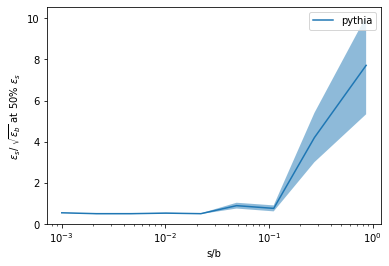

In [19]:

plt.plot(x_axis,tfpr50_mean2,label = 'pythia')
plt.plot(x_axis,tfpr50_mean3,label = 'GAN')

plt.fill_between(x_axis, np.asarray(tfpr50_mean2) - np.asarray(tfpr50_sd2), np.asarray(tfpr50_mean2)+np.asarray(tfpr50_sd2),alpha = 0.5) 
plt.fill_between(x_axis, np.asarray(tfpr50_mean3) - np.asarray(tfpr50_sd3), np.asarray(tfpr50_mean3)+np.asarray(tfpr50_sd3),alpha = 0.5) 
plt.ylabel('$\epsilon_s$/ $\sqrt{\epsilon_b}$ at 50% $\epsilon_s$')
plt.xlabel('s/b')
plt.xscale('log')
plt.legend()

In [27]:
tpr_1 = []
tpr_4 = []
fpr_1 = []
fpr_4 = []
auc_1 = []
auc_4=[]
for j in range(50):
    tpr1 = np.load('./Results/Classifier/dt1/dataset_case1/tpr/tpr_list_'+str(j)+'_.npy', allow_pickle=True)[0]
    tpr4 = np.load('./Results/Classifier/dt1/dataset_case4/tpr/tpr_list_'+str(j)+'_.npy', allow_pickle=True)[0]
    fpr1 = np.load('./Results/Classifier/dt1/dataset_case1/fpr/fpr_list_'+str(j)+'_.npy', allow_pickle=True)[0]
    fpr4 = np.load('./Results/Classifier/dt1/dataset_case4/fpr/fpr_list_'+str(j)+'_.npy', allow_pickle=True)[0]
    auc1 = np.load('./Results/Classifier/dt1/dataset_case1/auc/auc_list_'+str(j)+'_.npy', allow_pickle=True)[0]
    auc4 = np.load('./Results/Classifier/dt1/dataset_case4/auc/auc_list_'+str(j)+'_.npy', allow_pickle=True)[0]

    tpr_1.append(tpr1)
    tpr_4.append(tpr4)
    fpr_1.append(fpr1)
    fpr_4.append(fpr4)
    auc_1.append(auc1)
    auc_4.append(auc4)
    #print(len(tpr_1[0]))


In [26]:
mean_auc1 = np.mean(auc_1)
mean_auc4 = np.mean(auc_4)
tpr_mean1 = np.mean(tpr_1,axis=0)
tpr_mean4 = np.mean(tpr_4,axis=0)
fpr_mean1 = np.mean(fpr_1,axis=0)
fpr_mean4= np.mean(fpr_4,axis=0)

Text(0.5, 1.0, 'ROC')

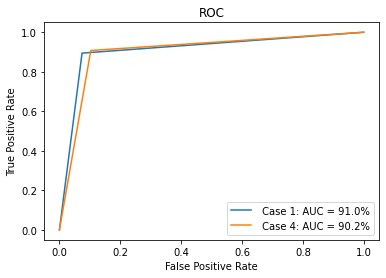

In [24]:

plt.plot(fpr_mean1,tpr_mean1,label=' Case 1: AUC = %.1f%%'%(mean_auc1*100.))
plt.plot(fpr_mean4,tpr_mean4,label=' Case 4: AUC = %.1f%%'%(mean_auc4*100.))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [64]:
auc_meanc3 = []
auc_stdc3 = []
auc_meanc2 = []
auc_stdc2 = []
for i in range(len(sb_ratio)):
    auc_avgc3 = []
    auc_avgc2 = []

    for j in range(100):
        acc3 = np.load('./Results/Classifier/dt3/auc/'+str(sb_ratio[i])+'/auc_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        acc2 = np.load('./Results/Classifier/dt2/auc/'+str(sb_ratio[i])+'/auc_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]

        auc_avgc2.append(acc2)
        auc_avgc3.append(acc3)
    #print(len(auc_avgc3
    print(len(auc_avgc2))
    auc_meanc3.append(np.mean(auc_avgc3,axis=0))
    auc_stdc3.append(np.std(auc_avgc3,axis=0))
    auc_meanc2.append(np.mean(auc_avgc2,axis=0))
    auc_stdc2.append(np.std(auc_avgc2,axis=0))


100
100
100
100
100
100
100
100
100
100


Text(0, 0.5, 'auc')

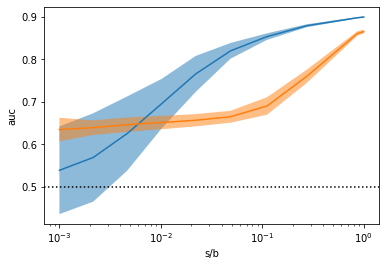

In [69]:

plt.plot(x_axis,auc_meanc2,label="Pythia")
plt.plot(x_axis,auc_meanc3,label="GAN")
plt.axhline(y=0.5, color='black', linestyle='dotted')
plt.fill_between(x_axis, np.asarray(auc_meanc2) - np.asarray(auc_stdc2), np.asarray(auc_meanc2)+np.asarray(auc_stdc2),alpha = 0.5) 
plt.fill_between(x_axis, np.asarray(auc_meanc3) - np.asarray(auc_stdc3), np.asarray(auc_meanc3)+np.asarray(auc_stdc3),alpha = 0.5) 
plt.xscale('log')

plt.xlabel("s/b")
plt.ylabel('auc')

In [28]:
maxtpr_list3 = []
maxtpr_sd3 = []
maxtpr_list2 = []
maxtpr_sd2 = []
for i in range(len(sb_ratio)):
    tpr_avg3 = []
    tpr_avg2 = []
    for j in range(100):

        tpr3 = np.load('./Results/Classifier/dt3/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr3 = np.load('./Results/Classifier/dt3/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]


        tpr2 = np.load('./Results/Classifier/dt2/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr2 = np.load('./Results/Classifier/dt2/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]

        #if(len(tpr3)<50000 or len(fpr3)<50000):
           # continue

        tpr3 = tpr3[fpr3!=0]
        fpr3 = fpr3[fpr3!=0]

        #if(len(tpr2)<50000 or len(fpr2)<50000):
            #continue
        tpr2 = tpr2[fpr2!=0]
        fpr2 = fpr2[fpr2!=0]



        
        m3 = np.max(tpr3/np.sqrt(fpr3))
        m2 = np.max(tpr2/np.sqrt(fpr2))
        #print(m)

        
        
        tpr_avg3.append(m3)
        tpr_avg2.append(m2)
        
        #print(tpr_avg)
    #print('____')
    maxtpr_list3.append(np.mean(tpr_avg3,axis=0))
    maxtpr_sd3.append(np.std(tpr_avg3,axis=0))
    maxtpr_list2.append(np.mean(tpr_avg2,axis=0))
    maxtpr_sd2.append(np.std(tpr_avg2,axis=0))

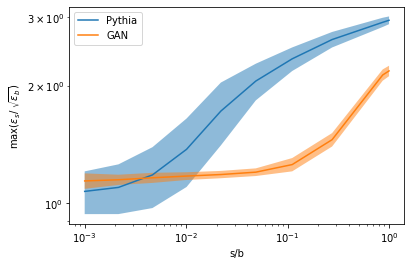

In [32]:

plt.plot(x_axis,maxtpr_list2,label = 'Pythia')
plt.plot(x_axis,maxtpr_list3,label = 'GAN')

plt.fill_between(x_axis, np.asarray(maxtpr_list2) - np.asarray(maxtpr_sd2), np.asarray(maxtpr_list2)+np.asarray(maxtpr_sd2),alpha = 0.5)
plt.fill_between(x_axis, np.asarray(maxtpr_list3) - np.asarray(maxtpr_sd3), np.asarray(maxtpr_list3)+np.asarray(maxtpr_sd3),alpha = 0.5)
plt.ylabel('max($\epsilon_s$/ $\sqrt{\epsilon_b}$)')
plt.xlabel('s/b')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [33]:
tfpr50_mean3 = []
tfpr50_sd3 = []
tfpr50_mean2 = []
tfpr50_sd2 = []
for i in range(len(sb_ratio)):
    fpr_avg3 = []
    fpr_avg2 = []
    tpr_avg3 = []
    tpr_avg2 = []

    #print('sb is ' + str(sb_ratio[i]))
    for j in range(100):

        tpr3 = np.load('./Results/Classifier/dt3/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr3 = np.load('./Results/Classifier/dt3/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]


        tpr2 = np.load('./Results/Classifier/dt2/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr2 = np.load('./Results/Classifier/dt2/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]

        #fpr2_100 = np.append(fpr2,fpr2_2)
        #tpr2_100 = np.append(tpr2,tpr2_2)
        
        
        f3= fpr3[np.where(tpr3>0.5)[0][0]]
        t3 = tpr3[np.where(tpr3>0.5)[0][0]]
        
        f2= fpr2[np.where(tpr2>0.5)[0][0]]
        t2 = tpr2[np.where(tpr2>0.5)[0][0]]


        fpr_avg3.append(f3)
        tpr_avg3.append(t3)
        fpr_avg2.append(f2)
        tpr_avg3.append(t2)



    tfpr50_mean3.append(0.5/ np.sqrt(np.mean(fpr_avg3)))

    tfpr50_sd3.append(np.std(tfpr50_mean3))
    tfpr50_mean2.append( 0.5 / np.sqrt(np.mean(fpr_avg2)))
    tfpr50_sd2.append(np.std(tfpr50_mean2))


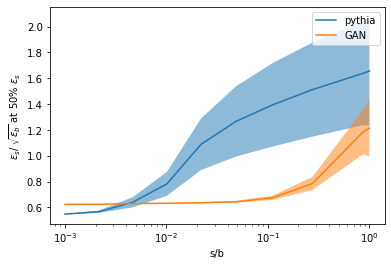

In [34]:

plt.plot(x_axis,tfpr50_mean2,label = 'pythia')
plt.plot(x_axis,tfpr50_mean3,label = 'GAN')

plt.fill_between(x_axis, np.asarray(tfpr50_mean2) - np.asarray(tfpr50_sd2), np.asarray(tfpr50_mean2)+np.asarray(tfpr50_sd2),alpha = 0.5) 
plt.fill_between(x_axis, np.asarray(tfpr50_mean3) - np.asarray(tfpr50_sd3), np.asarray(tfpr50_mean3)+np.asarray(tfpr50_sd3),alpha = 0.5) 
plt.ylabel('$\epsilon_s$/ $\sqrt{\epsilon_b}$ at 50% $\epsilon_s$')
plt.xlabel('s/b')
plt.xscale('log')
plt.legend()

In [37]:
fpr50_mean3 = []
fpr50_sd3 = []
fpr50_mean2 = []
fpr50_sd2 = []
for i in range(len(sb_ratio)):
    fpr_avg3 = []
    fpr_avg2 = []

    #print('sb is ' + str(sb_ratio[i]))
    for j in range(100):
        tpr3 = np.load('./Results/Classifier/dt3/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr3 = np.load('./Results/Classifier/dt3/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]


        tpr2 = np.load('./Results/Classifier/dt2/tpr/' +str(sb_ratio[i])+'/tpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]
        fpr2 = np.load('./Results/Classifier/dt2/fpr/' +str(sb_ratio[i])+'/fpr_list_'+str(j)+'_'+str(sb_ratio[i])+'.npy', allow_pickle=True)[0]

        
        #fpr2_100 = np.append(fpr2,fpr2_2)
        #tpr2_100 = np.append(tpr2,tpr2_2)
        
        
        f3= fpr3[np.where(tpr3>0.5)[0][0]]
        t3 = tpr3[np.where(tpr3>0.5)[0][0]]
        
        f2= fpr2[np.where(tpr2>0.5)[0][0]]
        t2 = tpr2[np.where(tpr2>0.5)[0][0]]


        fpr_avg3.append(f3)
        
        fpr_avg2.append(f2)

    fpr50_mean3.append(np.mean(fpr_avg3,axis=0))
    fpr50_sd3.append(np.std(fpr_avg3,axis=0))
    fpr50_mean2.append(np.mean(fpr_avg2,axis=0))
    fpr50_sd2.append(np.std(fpr_avg2,axis=0))



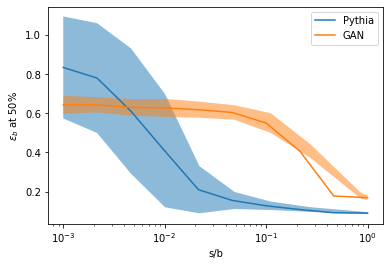

In [38]:
plt.plot(sb_ratio,fpr50_mean2,label = 'Pythia')
plt.plot(sb_ratio,fpr50_mean3,label = 'GAN')

plt.fill_between(x_axis, np.asarray(fpr50_mean2) - np.asarray(fpr50_sd2), np.asarray(fpr50_mean2)+np.asarray(fpr50_sd2),alpha = 0.5) 
plt.fill_between(x_axis, np.asarray(fpr50_mean3) - np.asarray(fpr50_sd3), np.asarray(fpr50_mean3)+np.asarray(fpr50_sd3),alpha = 0.5)
plt.ylabel('$\epsilon_b$ at 50%')
plt.xlabel('s/b')
plt.xscale('log')
plt.legend()

In [21]:
tpr_1 = []
tpr_4 = []
fpr_1 = []
fpr_4 = []
auc_1 = []
auc_4=[]
for j in range(50):
    tpr1 = np.load('./Results/Classifier/optimal/tpr/tpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
    #tpr4 = np.load('./Results/Classifier/optimal2/tpr/tpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
    fpr1 = np.load('./Results/Classifier/optimal/fpr/fpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
    #fpr4 = np.load('./Results/Classifier/optimal2/fpr/fpr_list'+str(j)+'_.npy', allow_pickle=True)[0]
    auc1 = np.load('./Results/Classifier/optimal/auc/auc_list'+str(j)+'_.npy', allow_pickle=True)[0]
    #auc4 = np.load('./Results/Classifier/optimal2/auc/auc_list'+str(j)+'_.npy', allow_pickle=True)[0]

    tpr_1.append(tpr1)
    #tpr_4.append(tpr4)
    fpr_1.append(fpr1)
    #fpr_4.append(fpr4)
    auc_1.append(auc1)
    #auc_4.append(auc4)
    print(len(tpr_1[j]))


77290
76885
76961
77297
77426
77805
79861
76744
77302
76980
77452
77846
76737
76609
77217
77046
77103
77140
77813
77135
76989
77236
77153
76942
76794
77089
78323
80257
77019
77192
77240
77120
76961
80205
77223
77457
77353
77535
76831
77333
76883
76781
77576
77559
77927
77482
77417
80376
77558
77315


In [18]:
mean_auc1 = np.mean(auc_1)
#mean_auc4 = np.mean(auc_4)
tpr_mean1 = np.mean(tpr_1,axis=0)
#tpr_mean4 = np.mean(tpr_4,axis=0)
fpr_mean1 = np.mean(fpr_1,axis=0)
#fpr_mean4= np.mean(fpr_4,axis=0)

ValueError: operands could not be broadcast together with shapes (77290,) (76885,) 

In [14]:
plt.plot(fpr_1,tpr_1,label=' Case 1: AUC = %.1f%%'%(mean_auc1*100.))
#plt.plot(fpr_mean4,tpr_mean4,label=' Case 4: AUC = %.1f%%'%(mean_auc4*100.))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

NameError: name 'mean_auc1' is not defined

In [70]:
import tensorflow as tf
from tensorflow import keras
imodel = tf.keras.models.load_model('./Results/cgan3_gaussian_Jun12_5001_512_wBN_12feat_5000epochs.h5')

In [104]:

def generate_cond_data_uni(n_model,stats,y_pick):
    #noise = np.random.normal(0,1, [stats, 12])
    noise = np.random.uniform(0,1, [stats, 12])
    #y_sqrt = np.ones([stats,1])*y_pick
    #bla = list_of_cgen_models[n_model].predict(np.hstack([noise,y_sqrt]))
    bla = imodel.predict(np.hstack([noise,y_pick]))
    return bla

In [105]:

def generate_cond_data(n_model,stats,y_pick):
    noise = np.random.normal(0,1, [stats, 12])
    #y_sqrt = np.ones([stats,1])*y_pick
    #bla = list_of_cgen_models[n_model].predict(np.hstack([noise,y_sqrt]))
    bla = imodel.predict(np.hstack([noise,y_pick]))
    return bla

In [73]:
train_features = ["ptj1", "etaj1", "phij1", "mj1", "ptj2", "etaj2", "phij2", "mj2", "tau21j1", "tau21j2", "tau32j1", "tau32j2"]
condition_features = ["mjj"]

In [74]:
def fake_vs_real(gen_data,real_data,sig_data,doLog,names):

    plt.figure(figsize=(20,30))
    colors = ["steelblue", "darkturquoise"]
    for p in range(0,12):
        R = np.linspace(plotting_ranges[p][0],plotting_ranges[p][1],50)
        plt.subplot(6, 2, p+1)
        for rd in real_data: b_hist_y, b_hist_x, _ = plt.hist(rd[:,p], R, color="black", histtype='step', linewidth=2, label="Real B",density=True)        
        for i,n in enumerate(gen_data): plt.hist(n[:,p], R, color=colors[i], histtype='stepfilled', alpha=0.5, linewidth=2, label="Generated B %s"%names[i],density=True)
        s_hist_y, s_hist_x, _ = plt.hist(sig_data[:,p], R, color="r", histtype='step', linewidth=3, label="Signal", density=True)
        plt.xlabel("%s"%variables_names[p])
        if doLog == True: plt.yscale('log')
        plt.ylabel("Number of Events / bin")
        plt.legend(fontsize="large")
        ymax_b = np.max(b_hist_y)
        ymax_s = np.max(s_hist_y)
        plt.ylim(0,np.max([ymax_b,ymax_s])*1.5)

In [122]:
bkg_sb= np.load("./data/np_bg_SB_2_I.npy")
sig_sb = np.load("./data/np_sig_SB_2_I.npy")

sig_sr = np.load("./data/np_sig_SR_2_I.npy")
bkg_sr = np.load("./data/np_bg_SR_2_I.npy")

In [123]:
X_bg_SB = bkg_sb[:,:len(train_features)]
y_bg_SB = bkg_sb[:,len(train_features)]
X_sig_SB = sig_sb[:,:len(train_features)]

X_bg_SR = bkg_sr[:,:len(train_features)]
y_bg_SR = bkg_sr[:,len(train_features)]
X_sig_SR = sig_sr[:,:len(train_features)]

In [124]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1)).fit(X_bg_SB)
scaler_mjj = MinMaxScaler((0,1)).fit(y_bg_SB.reshape(-1,1))

In [128]:
cfake_sr_0 = generate_cond_data(0,y_bg_SR.shape[0],scaler_mjj.transform(y_bg_SR.reshape(y_bg_SR.shape[0],1))) 

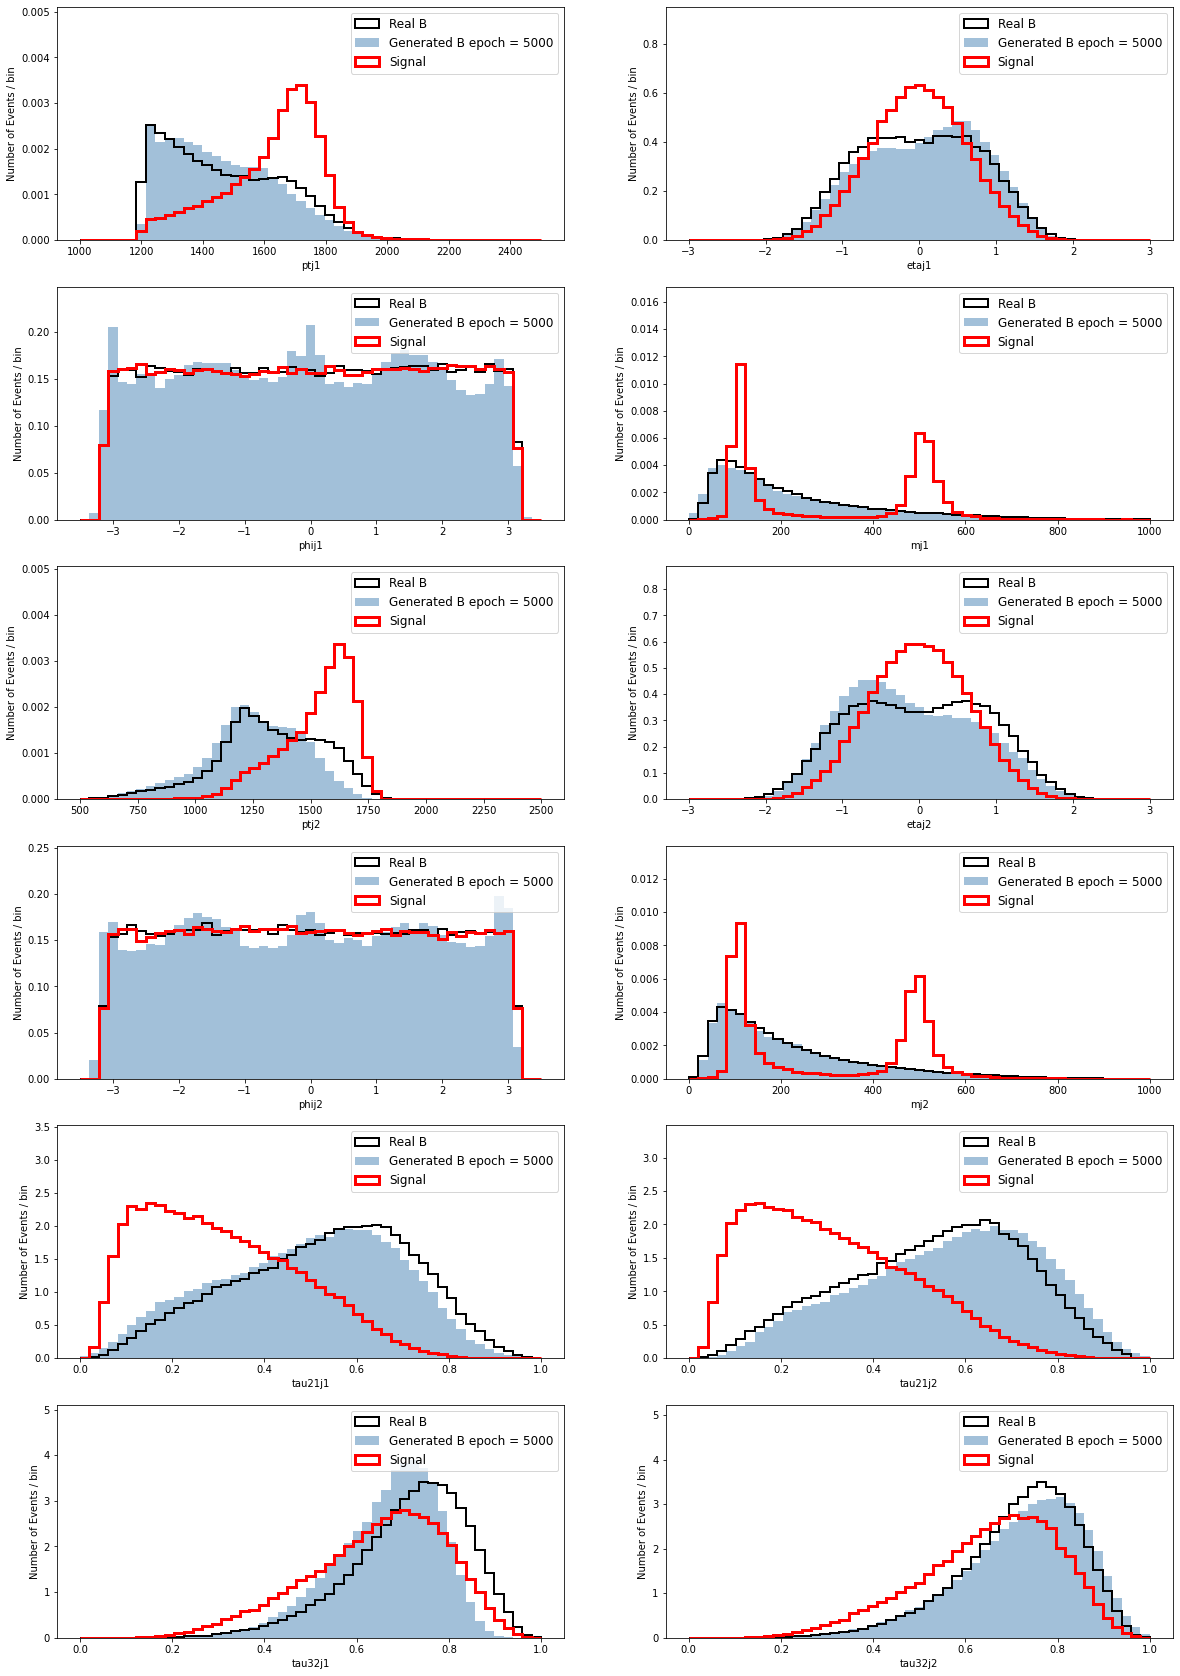

In [129]:
variables_names = train_features
plotting_ranges = [(1000,2500),(-3,3),(-3.5,3.5),(0,1000),(500,2500),(-3,3),(-3.5,3.5),(0,1000),(0,1),(0,1),(0,1),(0,1)]
fake_vs_real([scaler.inverse_transform(cfake_sb_0)],[X_bg_SR],X_sig_SR,0,["epoch = 5000"])

In [41]:
test_data = np.load('./data/test_data_1.npy')
train_sig = np.load('./data/train_signal_1.npy')
train_background = np.load('./data/train_background_1.npy')

In [46]:
train_background.shape[0]

121134

In [47]:
train_sig.shape[0]

75502